In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col

path= 'data/final_cleaned_data.csv'

data=pd.read_csv(path)
pd.set_option('display.max_columns',None)
data

,Unnamed: 0,ID,Gender,Age,Income,Exercise,Coffee,Tea,Soda,Milk,Juice,EnergyDrink,SparklingWater,Alcohol,Purchase_Location,Ingredients_Quality,Consumption,Taste,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Platforms,Units,Purpose,Motto_Price,Motto_Likelihood,Motto_Flavor
0,2,R_UEENeM2ghM5uKK5,Male,24,">150,000",4-6,4,5,1,1,2,1,5,1,Convenience Stores,5,2,4,4,5,3,0,In-Store Ads,Per Unit,Refreshment,4.0,7,Matcha
1,3,R_AzdTD7ACCdSVCTv,Male,23,"50,000-100,000",1-3,2,1,5,3,4,2,2,2,Restaurants/Cafes,4,1,5,1,0,1,3,Word of Mouth,Bulk,Refreshment,0.0,0,Rooibos
2,4,R_2642Y0EiU2ABVzi,Male,24,"100,000-150,000",1-3,2,3,4,1,4,3,3,3,Restaurants/Cafes,3,0,4,3,4,4,4,Word of Mouth,Per Unit,Refreshment,2.0,8,Matcha
3,5,R_1ONMulo6dpFaq04,Male,26,"<50,000",0,2,4,1,5,2,5,5,5,Online,4,2,4,1,5,5,1,Instagram,Per Unit,Increased Focus,6.0,7,Matcha
4,6,R_1lo8HoT9csBWOxP,Female,24,"100,000-150,000",1-3,2,3,1,2,3,1,5,5,Convenience Stores,5,1,4,1,5,5,3,Word of Mouth,Per Unit,Increased Focus,6.5,7,Matcha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,104,R_3lQDroR045aAk6M,Female,23,">150,000",4-6,4,3,3,2,2,4,4,2,Convenience Stores,3,3,4,3,3,5,1,In-Store Ads,Per Unit,Energy Boost,5.0,3,Matcha
98,105,R_3KPE06VqIEladT4,Female,19,"50,000-100,000",1-3,4,5,2,4,4,2,2,3,Convenience Stores,4,1,5,5,5,4,4,In-Store Ads,Per Unit,Refreshment,3.0,7,Matcha
99,106,R_3lyPQPa7kP0tEis,Female,21,">150,000",0,1,4,2,1,3,1,3,1,Convenience Stores,4,2,4,3,4,0,0,Word of Mouth,Per Unit,Refreshment,4.0,9,Matcha
100,107,R_3qD4xaOcxjG2EXM,Male,21,"50,000-100,000",1-3,4,2,3,4,5,5,1,2,Convenience Stores,5,2,5,5,4,4,4,Word of Mouth,Bulk,Refreshment,5.0,8,Matcha


In [2]:
#summary stats
data.drop(columns='Unnamed: 0', inplace=True)

In [3]:
data.describe()

,Age,Coffee,Tea,Soda,Milk,Juice,EnergyDrink,SparklingWater,Alcohol,Ingredients_Quality,Consumption,Taste,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Motto_Price,Motto_Likelihood
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.00000,102.000000,102.000000
mean,20.921569,3.235294,3.313725,2.558824,2.382353,3.284314,2.264706,2.352941,2.774510,3.166667,1.980392,4.500000,2.421569,3.215686,2.921569,3.27451,3.310294,5.892157
std,3.036694,1.555422,1.226606,1.294111,1.243152,1.261599,1.304421,1.332362,1.311841,1.456181,1.448662,0.741286,1.403223,1.459876,1.627038,1.40125,1.628267,2.563672
min,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,19.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000,4.000000,1.000000,3.000000,1.500000,3.00000,2.112500,4.250000
50%,20.000000,4.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,2.000000,5.000000,3.000000,4.000000,3.000000,4.00000,3.000000,7.000000
75%,21.750000,5.000000,4.000000,3.750000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,5.000000,3.000000,4.000000,4.000000,4.00000,4.000000,8.000000
max,38.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.00000,12.000000,10.000000


In [4]:
summ = data.describe()
summ.to_csv('summTable.csv')

In [5]:
data.Age.median()

20.0

In [6]:
data.Motto_Likelihood.mode()

0    7
Name: Motto_Likelihood, dtype: int64

In [7]:
#Gender counts 
data.value_counts("Gender", normalize=True)

Gender
Female    0.578431
Male      0.421569
dtype: float64

In [8]:
#exercise counts
data.value_counts("Exercise", normalize=True)

Exercise
1-3    0.509804
4-6    0.313725
0      0.156863
7+     0.019608
dtype: float64

In [9]:
#income counts
data.value_counts("Income", normalize=True)

Income
<50,000            0.313725
50,000-100,000     0.264706
>150,000           0.254902
100,000-150,000    0.166667
dtype: float64

In [10]:
#platform counts 
data.value_counts("Platforms", normalize=True)

Platforms
Word of Mouth    0.607843
Instagram        0.127451
TikTok           0.127451
In-Store Ads     0.117647
Web Ads          0.019608
dtype: float64

In [11]:
#Motto flavor counts
data.value_counts("Motto_Flavor", normalize=True)

Motto_Flavor
Matcha     0.696078
Rooibos    0.303922
dtype: float64

In [12]:
#Purpose counts 
data.value_counts("Purpose", normalize=True)

Purpose
Refreshment           0.529412
Energy Boost          0.205882
Increased Focus       0.156863
Dining Compliments    0.098039
Alcohol Subsitute     0.009804
dtype: float64

In [13]:
#Units Count 
data.value_counts("Units", normalize=True)

Units
Per Unit    0.754902
Bulk        0.245098
dtype: float64

In [14]:
#purchase location counts

data.value_counts("Purchase_Location", normalize=True)

Purchase_Location
Convenience Stores    0.568627
Restaurants/Cafes     0.205882
Supermarkets          0.176471
Online                0.049020
dtype: float64

In [15]:
#description of "typical" data 

#Female (dem)
#20.9 years old (dem)
#Income <50,000 (dem)
#Exercise 1-3x a week 
#They value taste the most, average rating of 4.5/5 
#Health benefits most important 
#Pay on average, $3.27 for a beverage 
#willing to pay on average $3.3 for Motto 
#Prefer Matcha over Rooibos 
#Prefer to buy per unit 
#Consume for refreshment 
#Hear about their beverages through word of mouth 
#consume about 2 drinks other than water per day 
#purchase in conveneience stores 

In [16]:
#random observation 
df=pd.DataFrame(data)
pd.set_option('display.max_columns',None)
df.sample()

,ID,Gender,Age,Income,Exercise,Coffee,Tea,Soda,Milk,Juice,EnergyDrink,SparklingWater,Alcohol,Purchase_Location,Ingredients_Quality,Consumption,Taste,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Platforms,Units,Purpose,Motto_Price,Motto_Likelihood,Motto_Flavor
101,R_31QRAtBU3ck1VSG,Male,22,">150,000",1-3,5,5,3,3,4,1,3,4,Convenience Stores,5,1,5,3,4,3,3,Word of Mouth,Per Unit,Refreshment,3.5,7,Matcha


/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_75895/2150647910.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data.Age, palette=("Blues_d"))


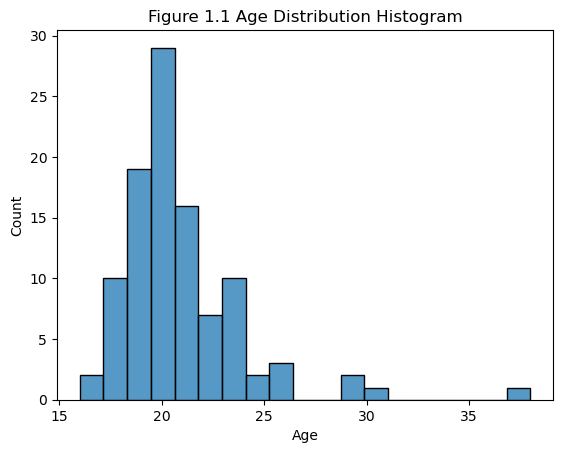

count    102.000000
mean      20.921569
std        3.036694
min       16.000000
25%       19.000000
50%       20.000000
75%       21.750000
max       38.000000
Name: Age, dtype: float64

In [17]:
#Age Distribution

sns.histplot(data.Age, palette=("Blues_d"))
plt.title("Figure 1.1 Age Distribution Histogram")
plt.show()
data.Age.describe()


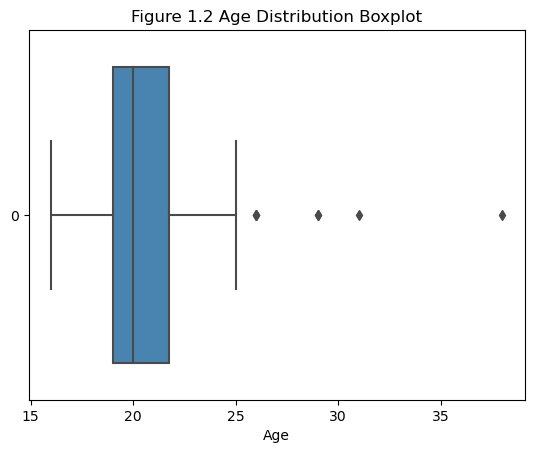

In [18]:

sns.boxplot(data.Age, orient='h', palette=("Blues_d"))
plt.title("Figure 1.2 Age Distribution Boxplot")
plt.xlabel('Age')
plt.show()

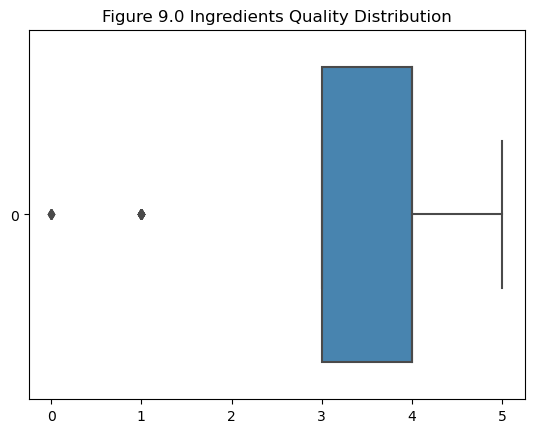

In [19]:
#ingredients quality
sns.boxplot(data.Ingredients_Quality, orient = 'h', palette =('Blues_d'))
plt.title('Figure 9.0 Ingredients Quality Distribution')
plt.show()

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_75895/1376700728.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data.Ingredients_Quality, palette = "Blues_d")


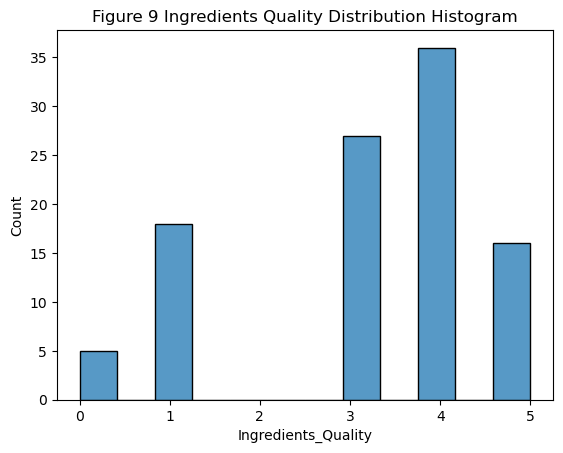

count    102.000000
mean       3.166667
std        1.456181
min        0.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Ingredients_Quality, dtype: float64

In [20]:
sns.histplot(data.Ingredients_Quality, palette = "Blues_d")
plt.title('Figure 9 Ingredients Quality Distribution Histogram')
plt.show()
data.Ingredients_Quality.describe()

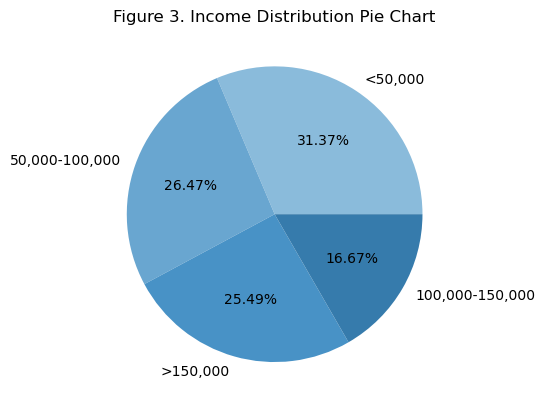

In [21]:
#Income Distribution
inc=data.Income.value_counts(normalize=True)
plt.pie(inc, labels =inc.index,autopct = '%2.2f%%', colors=sns.color_palette("Blues_d"))
plt.title("Figure 3. Income Distribution Pie Chart")
plt.show()

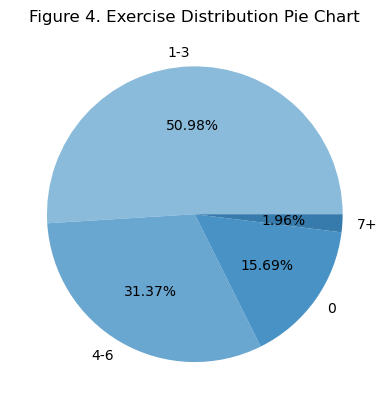

In [22]:
#exercise
inc=data.Exercise.value_counts(normalize=True)
plt.pie(inc, labels= inc.index,autopct = '%2.2f%%', colors=sns.color_palette("Blues_d"))
plt.title("Figure 4. Exercise Distribution Pie Chart")
plt.show()

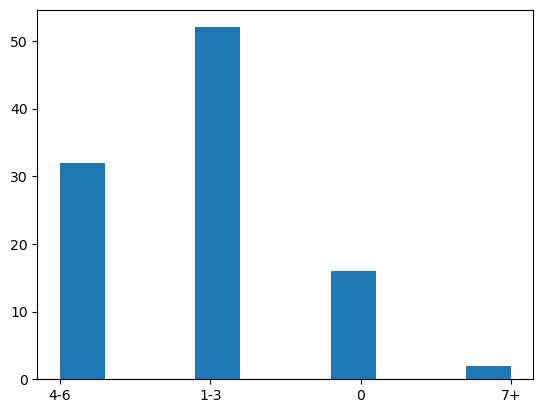

count     102
unique      4
top       1-3
freq       52
Name: Exercise, dtype: object

In [23]:
#Exercise Distribution
plt.hist(data.Exercise)
plt.show()
data.Exercise.describe()

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_75895/1073572628.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data.Consumption, palette = "Blues_d")


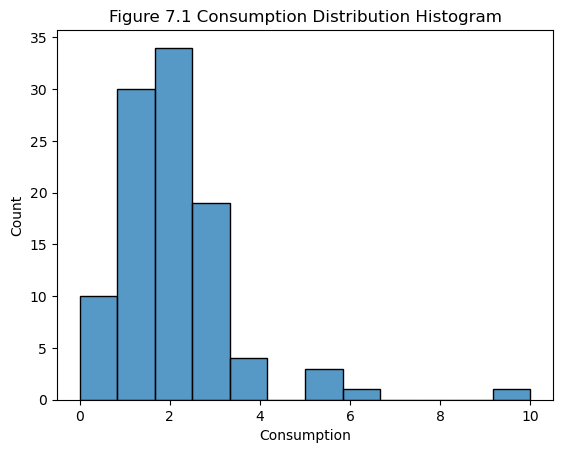

count    102.000000
mean       1.980392
std        1.448662
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: Consumption, dtype: float64

In [24]:
#consumption distribution
sns.histplot(data.Consumption, palette = "Blues_d")
plt.title('Figure 7.1 Consumption Distribution Histogram')
plt.show()
data.Consumption.describe()

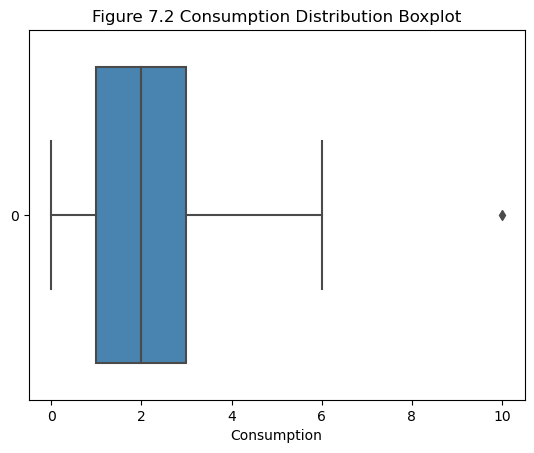

In [25]:
sns.boxplot(data.Consumption, orient='h', palette = "Blues_d")
plt.title('Figure 7.2 Consumption Distribution Boxplot')
plt.xlabel('Consumption')
plt.show()

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_75895/1856683334.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data.Motto_Likelihood, palette = "Blues_d")


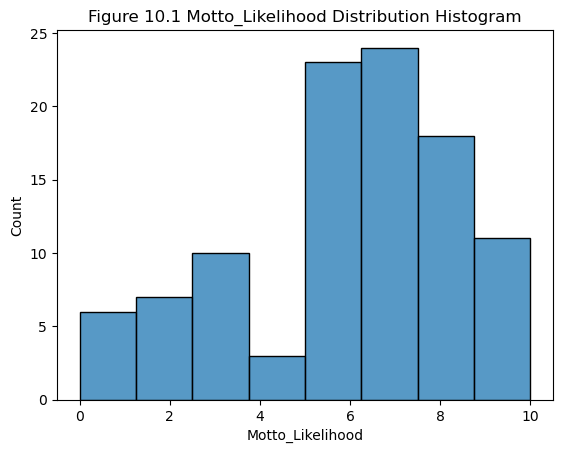

count    102.000000
mean       5.892157
std        2.563672
min        0.000000
25%        4.250000
50%        7.000000
75%        8.000000
max       10.000000
Name: Motto_Likelihood, dtype: float64

In [26]:
#Motto Likelihood Distribution
sns.histplot(data.Motto_Likelihood, palette = "Blues_d")
plt.title('Figure 10.1 Motto_Likelihood Distribution Histogram')
plt.show()
data.Motto_Likelihood.describe()

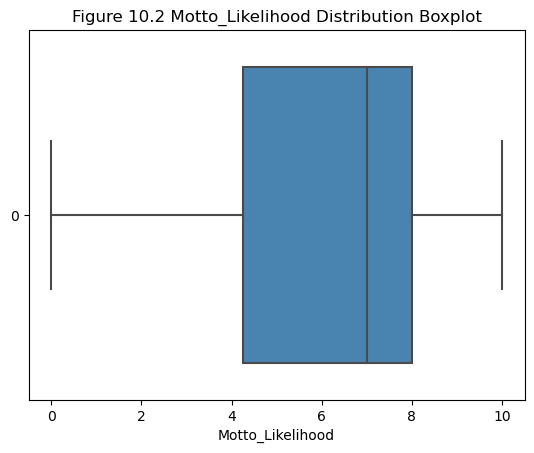

In [27]:
sns.boxplot(data.Motto_Likelihood, orient='h', palette = "Blues_d")
plt.title('Figure 10.2 Motto_Likelihood Distribution Boxplot')
plt.xlabel('Motto_Likelihood')
plt.show()

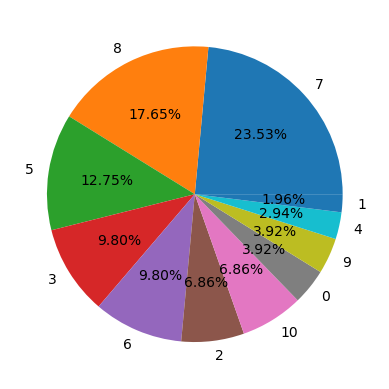

In [28]:
ranks=data.Motto_Likelihood.value_counts(normalize=True)
plt.pie(ranks, labels =ranks.index,autopct = '%2.2f%%')
plt.show()

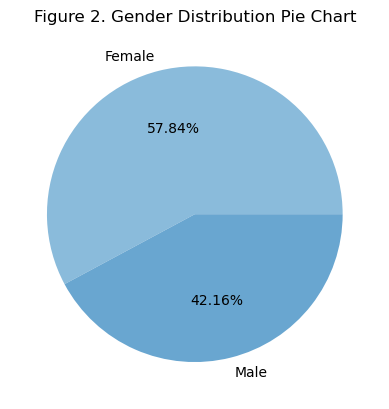

In [29]:
#Gender chart 
genders=data.Gender.value_counts(normalize=True)
plt.pie(genders, labels =genders.index,autopct = '%2.2f%%', colors=sns.color_palette("Blues_d"))
plt.title("Figure 2. Gender Distribution Pie Chart")
plt.show()


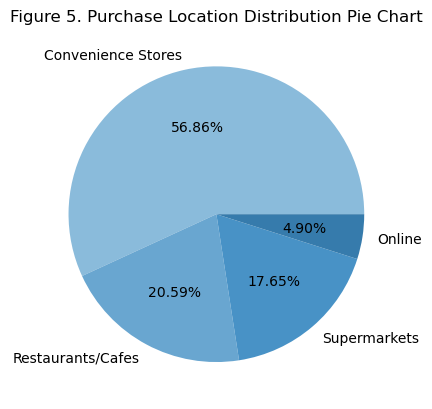

In [30]:
#purchase location chart 
locations=data.Purchase_Location.value_counts(normalize=True)
plt.pie(locations, labels =locations.index,autopct = '%1.2f%%',colors=sns.color_palette("Blues_d"))
plt.title("Figure 5. Purchase Location Distribution Pie Chart")
plt.show()

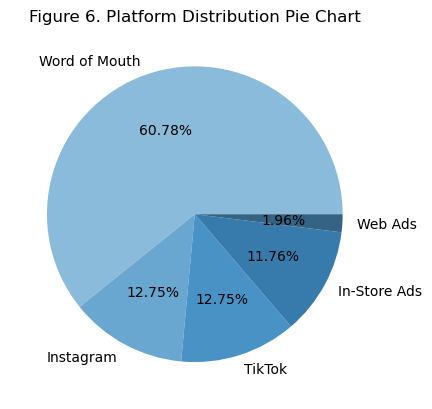

In [31]:
#platforms chart
locations=data.Platforms.value_counts(normalize=True)
plt.pie(locations, labels =locations.index,autopct = '%2.2f%%',colors=sns.color_palette("Blues_d"))
plt.title("Figure 6. Platform Distribution Pie Chart")
plt.show()



/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_75895/1327505896.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data.Motto_Price, palette = "Blues_d")


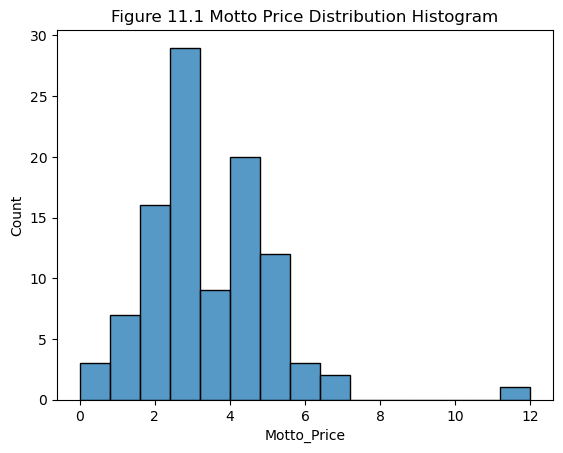

count    102.000000
mean       3.310294
std        1.628267
min        0.000000
25%        2.112500
50%        3.000000
75%        4.000000
max       12.000000
Name: Motto_Price, dtype: float64

In [32]:
#motto price 
sns.histplot(data.Motto_Price, palette = "Blues_d")
plt.title('Figure 11.1 Motto Price Distribution Histogram')
plt.show()
data.Motto_Price.describe()

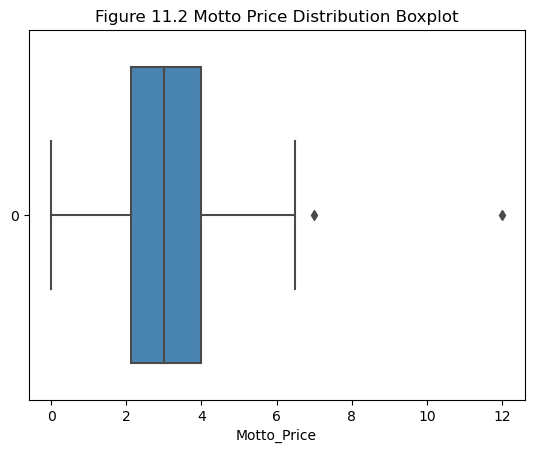

In [33]:
sns.boxplot(data.Motto_Price, orient='h', palette = "Blues_d")
plt.title('Figure 11.2 Motto Price Distribution Boxplot')
plt.xlabel('Motto_Price')
plt.show()

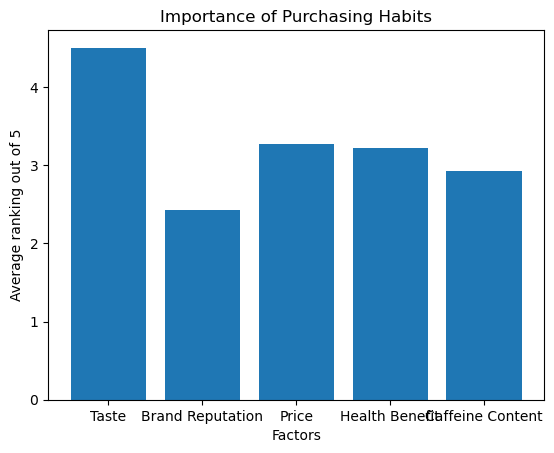

In [34]:
#factors 
means = data[['Taste', 'Brand_Reputation', 'Price', 'Health_Benefit', 'Caffeine_Content']].mean()
factors = ['Taste', 'Brand Reputation', 'Price', 'Health Benefit', 'Caffeine Content']


plt.bar(factors, means)
plt.xlabel('Factors')
plt.ylabel('Average ranking out of 5')
plt.title('Importance of Purchasing Habits')
plt.show()

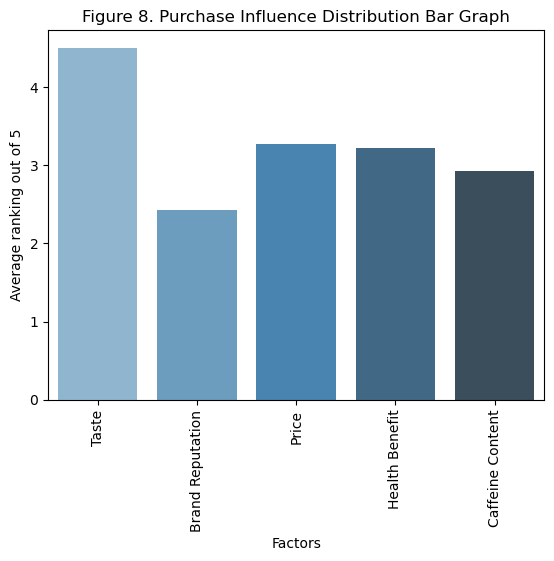

In [35]:
sns.barplot(x=factors, y=means, palette=('Blues_d'))
plt.xlabel('Factors')
plt.ylabel('Average ranking out of 5')
plt.xticks(rotation=90)
plt.title('Figure 8. Purchase Influence Distribution Bar Graph')
plt.show()